In [1]:
import os
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from scipy.sparse import csr_matrix
from scipy.sparse import hstack

import joblib

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
path = "aclImdb/train"
files = os.listdir(path)
for file in files:
    print(file)

labeledBow.feat
neg
pos
unsup
unsupBow.feat
urls_neg.txt
urls_pos.txt
urls_unsup.txt


In [11]:
path = "aclImdb/train/neg"
files = os.listdir(path)
for file in files:
    print(os.path.splitext(file)[0].split('_'))

['0', '3']
['10000', '4']
['10001', '4']
['10002', '1']
['10003', '1']
['10004', '3']
['10005', '3']
['10006', '4']
['10007', '1']
['10008', '2']
['10009', '1']
['1000', '4']
['10010', '3']
['10011', '3']
['10012', '1']
['10013', '1']
['10014', '2']
['10015', '2']
['10016', '4']
['10017', '4']
['10018', '3']
['10019', '3']
['1001', '4']
['10020', '3']
['10021', '2']
['10022', '4']
['10023', '1']
['10024', '3']
['10025', '1']
['10026', '2']
['10027', '1']
['10028', '2']
['10029', '1']
['1002', '3']
['10030', '1']
['10031', '2']
['10032', '4']
['10033', '1']
['10034', '1']
['10035', '1']
['10036', '1']
['10037', '1']
['10038', '3']
['10039', '1']
['1003', '3']
['10040', '2']
['10041', '1']
['10042', '1']
['10043', '1']
['10044', '1']
['10045', '1']
['10046', '1']
['10047', '1']
['10048', '4']
['10049', '1']
['1004', '4']
['10050', '2']
['10051', '4']
['10052', '4']
['10053', '4']
['10054', '1']
['10055', '3']
['10056', '2']
['10057', '1']
['10058', '1']
['10059', '4']
['1005', '3']
['100

In [4]:
with open("aclImdb/imdb.vocab", "r") as file:
    lines = file.readlines()
    
imdb_vocab = {}
for line in lines:
    imdb_vocab[line.strip()] = 1
    print(line.strip())

the
and
a
of
to
is
it
in
i
this
that
was
as
for
with
movie
but
film
on
not
you
he
are
his
have
be
one
!
all
at
by
an
who
they
from
so
like
there
her
or
just
about
if
has
out
what
?
some
good
more
when
she
very
even
my
no
up
time
would
which
only
story
really
their
see
had
can
were
me
we
than
well
much
been
get
people
will
bad
other
also
into
do
because
great
first
how
him
most
don't
its
made
then
them
way
make
could
too
any
after
movies
think
characters
character
watch
films
two
many
seen
being
acting
never
plot
little
where
love
best
life
did
show
know
does
ever
here
better
man
your
still
end
over
off
these
say
scene
why
while
scenes
such
go
something
should
through
back
i'm
those
watching
real
though
now
doesn't
thing
years
actors
director
another
didn't
before
nothing
new
funny
actually
work
makes
find
look
old
few
going
same
again
lot
part
every
cast
us
world
quite
want
things
pretty
young
seems
around
got
down
however
can't
fact
horror
take
enough
both
may
give
original
between
bi

In [ ]:
# train_df = {'id', 'comment', 'rating', 'check_pos_neg'}

In [3]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

In [4]:
# Функция для обработки одного файла и извлечения информации
def process_file(filepath, check_pos_neg):
    filename = os.path.basename(filepath)
    file_id, rating = filename.split('_')[0], filename.split('_')[1].split('.')[0]
    with open(filepath, 'r', encoding='utf-8') as f:
        comment = f.read().strip()
    return file_id, rating, check_pos_neg, comment

In [5]:
def create_dataset(base_path, types):
    dataset = []
    
    # Проходим по train/ и test/ директориям
    for data_type in types:
        for sentiment in ['pos', 'neg']:
            folder_path = os.path.join(base_path, data_type, sentiment)
            files = os.listdir(folder_path)
            for file in files:
                file_path = os.path.join(folder_path, file)
                file_id, rating, check_pos_neg, comment = process_file(file_path, sentiment)
                # Добавляем информацию о файле в датасет
                dataset.append([int(file_id), int(rating), check_pos_neg, comment])

    # Создаем DataFrame из собранных данных
    df = pd.DataFrame(dataset, columns=['id', 'rating', 'check_pos_neg', 'comment'])
    
    return df

# Указываем путь к директории с данными
base_path = 'aclImdb'
df_train = create_dataset(base_path, ['train'])
df_test = create_dataset(base_path, ['test'])

# Сохраняем DataFrame в файл (например, в CSV)
df_train.to_csv('movie_reviews_dataset.csv', index=False)
df_test.to_csv('movie_reviews_dataset.csv', index=False)




In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             25000 non-null  int64 
 1   rating         25000 non-null  int64 
 2   check_pos_neg  25000 non-null  object
 3   comment        25000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             25000 non-null  int64 
 1   rating         25000 non-null  int64 
 2   check_pos_neg  25000 non-null  object
 3   comment        25000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.4+ KB


In [8]:
df_train.head()

,id,rating,check_pos_neg,comment
0,0,9,pos,Bromwell High is a cartoon comedy. It ran at t...
1,10000,8,pos,Homelessness (or Houselessness as George Carli...
2,10001,10,pos,Brilliant over-acting by Lesley Ann Warren. Be...
3,10002,7,pos,This is easily the most underrated film inn th...
4,10003,8,pos,This is not the typical Mel Brooks film. It wa...


In [9]:
df_train['comment'] = df_train['comment'].apply(preprocess)
df_test['comment'] = df_test['comment'].apply(preprocess)

df_train.head()

,id,rating,check_pos_neg,comment
0,0,9,pos,bromwell high is a cartoon comedy it ran at th...
1,10000,8,pos,homelessness or houselessness as george carlin...
2,10001,10,pos,brilliant by lesley ann warren best dramatic h...
3,10002,7,pos,this is easily the most underrated film inn th...
4,10003,8,pos,this is not the typical mel brooks film it was...


In [11]:
# Преобразуем метки 'check_pos_neg' в числовые: 1 для 'pos', 0 для 'neg'
df_train['check_pos_neg'] = df_train['check_pos_neg'].map({'pos': 1, 'neg': 0})
df_test['check_pos_neg'] = df_test['check_pos_neg'].map({'pos': 1, 'neg': 0})

df_train.drop(columns = ['id'])
df_test.drop(columns = ['id'])

# TF-IDF векторизация только для комментариев
tfidf = TfidfVectorizer()
X_train_text = tfidf.fit_transform(df_train['comment'])  # Обучаем на тренировочных данных
X_test_text = tfidf.transform(df_test['comment'])  # Преобразуем тестовые данные

# Преобразуем рейтинг в массив
X_train_rating = df_train[['rating']].values
X_test_rating = df_test[['rating']].values

X_train = hstack([X_train_text, csr_matrix(X_train_rating)])  # Преобразуем рейтинг в разреженный формат
X_test = hstack([X_test_text, csr_matrix(X_test_rating)])  # Преобразуем рейтинг в разреженный формат

y_train = df_train['check_pos_neg']
y_test = df_test['check_pos_neg']

In [50]:
X_train

<25000x72583 sparse matrix of type '<class 'numpy.float64'>'
	with 3344430 stored elements in Compressed Sparse Row format>

In [37]:
# # Обучение модели логистической регрессии
# model = LogisticRegression()
# model.fit(X_train_tfidf, y_train)
# y_pred = model.predict(X_test_tfidf)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')
# print(classification_report(y_test, y_pred))

Accuracy: 88.25%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [12]:
# Обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Подробный отчет
print(classification_report(y_test, y_pred))

Accuracy: 95.77%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12500
           1       0.97      0.95      0.96     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



In [14]:
# Сохранение модели и векторизатора
joblib.dump(model, 'model.pkl')
joblib.dump(tfidf, 'vectorizer.pkl')


['vectorizer.pkl']

In [54]:
# Предположим, у вас есть новый комментарий и его рейтинг
new_comment = "This movie was amazing! I loved the storyline and the characters."
new_rating = 9  # Пример рейтинга

# Применяем предобработку
preprocessed_comment = preprocess(new_comment)

# Преобразуем новый комментарий в TF-IDF вектор
new_comment_tfidf = tfidf.transform([preprocessed_comment])  # Обратите внимание, что это список

# Шаг 3: Создание массива для рейтинга
new_rating_array = np.array([[new_rating]])  # Преобразуем в двумерный массив

# Преобразуем рейтинг в разреженный формат
new_rating_sparse = csr_matrix(new_rating_array)

# Шаг 4: Объединение признаков
new_input = hstack([new_comment_tfidf, new_rating_sparse])

# Шаг 5: Прогнозирование
prediction = model.predict(new_input)

# Интерпретация результата
sentiment = 'positive' if prediction[0] == 1 else 'negative'
print(f"The predicted sentiment for the comment is: {sentiment}")


The predicted sentiment for the comment is: positive


In [55]:
# Предположим, у вас есть новый комментарий и его рейтинг
new_comment = "I was extremely disappointed with this movie. The plot was predictable, and the acting was mediocre at best. Some scenes felt ridiculous and lacked any real emotion. I expected much more, but instead, I got a boring and dragged-out story. I do not recommend it."
new_rating = 3  # Пример рейтинга

# Применяем предобработку
preprocessed_comment = preprocess(new_comment)

# Преобразуем новый комментарий в TF-IDF вектор
new_comment_tfidf = tfidf.transform([preprocessed_comment])  # Обратите внимание, что это список

# Шаг 3: Создание массива для рейтинга
new_rating_array = np.array([[new_rating]])  # Преобразуем в двумерный массив

# Преобразуем рейтинг в разреженный формат
new_rating_sparse = csr_matrix(new_rating_array)

# Шаг 4: Объединение признаков
new_input = hstack([new_comment_tfidf, new_rating_sparse])

# Шаг 5: Прогнозирование
prediction = model.predict(new_input)

# Интерпретация результата
sentiment = 'positive' if prediction[0] == 1 else 'negative'
print(f"The predicted sentiment for the comment is: {sentiment}")

The predicted sentiment for the comment is: negative


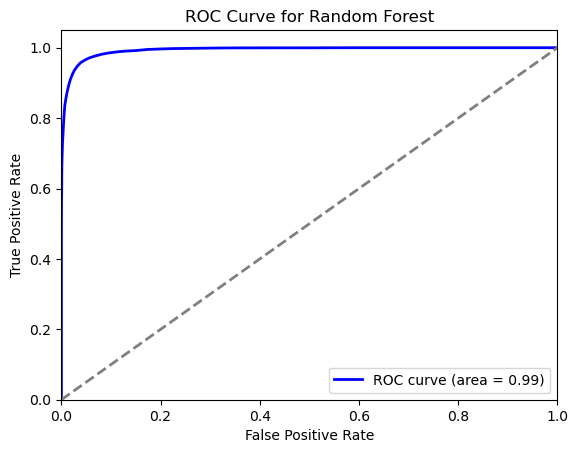

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


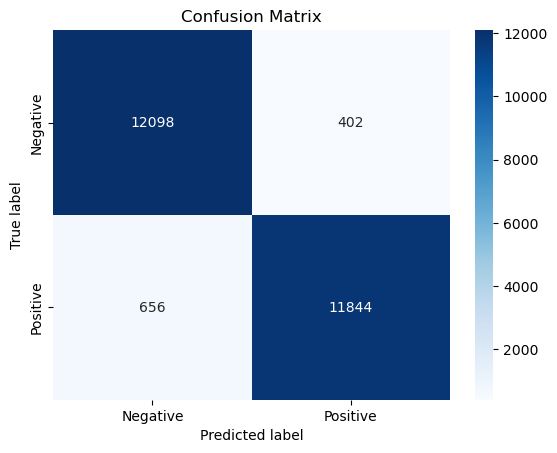

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Визуализация с помощью heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


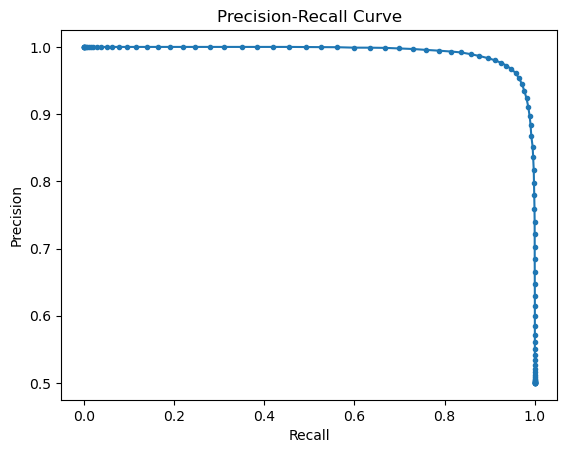

In [19]:
# Кривая Precision-Recall
from sklearn.metrics import precision_recall_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [21]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [22]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)